Импортируем нужные библиотеки

In [1584]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from typing import Optional


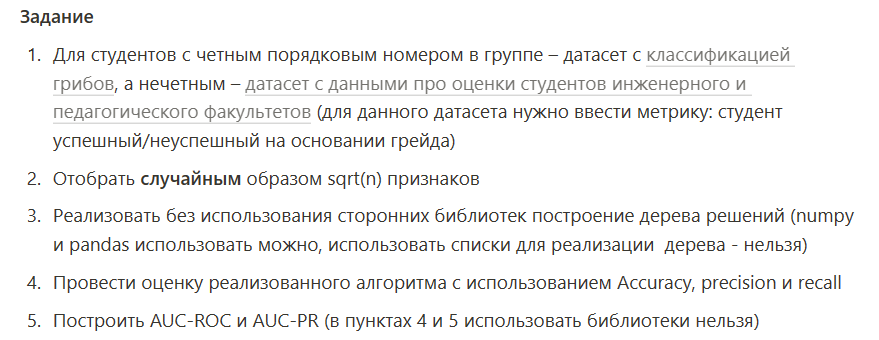

# **Предварительная обработка**

In [1585]:
data = pd.read_csv("DATA (1).csv")
data

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


"для данного датасета нужно ввести метрику: студент успешный/неуспешный на основании грейда"

Обновим столбец GRADE, в котором будем определять успешность студента - если у студента грейд больше или равен 4, он успешен.

In [1586]:
data['GRADE'] = data['GRADE'].apply(lambda x: 1 if x >= 4 else 0)
data

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,1


In [1587]:
#Проверка отсутствующих значений
data.isna().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accomodation type in Cyprus                                          0
Mother's education                                                   0
Father's education                                                   0
Number of sisters/brothers                                           0
Parent

array([[<Axes: title={'center': 'Student Age'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Graduated high-school type'}>,
        <Axes: title={'center': 'Scholarship type'}>,
        <Axes: title={'center': 'Additional work'}>,
        <Axes: title={'center': 'Regular artistic or sports activity'}>],
       [<Axes: title={'center': 'Do you have a partner'}>,
        <Axes: title={'center': 'Total salary if available'}>,
        <Axes: title={'center': 'Transportation to the university'}>,
        <Axes: title={'center': 'Accomodation type in Cyprus'}>,
        <Axes: title={'center': "Mother's education"}>,
        <Axes: title={'center': "Father's education"}>],
       [<Axes: title={'center': 'Number of sisters/brothers'}>,
        <Axes: title={'center': 'Parental status'}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Weekly study hours'}>,
        

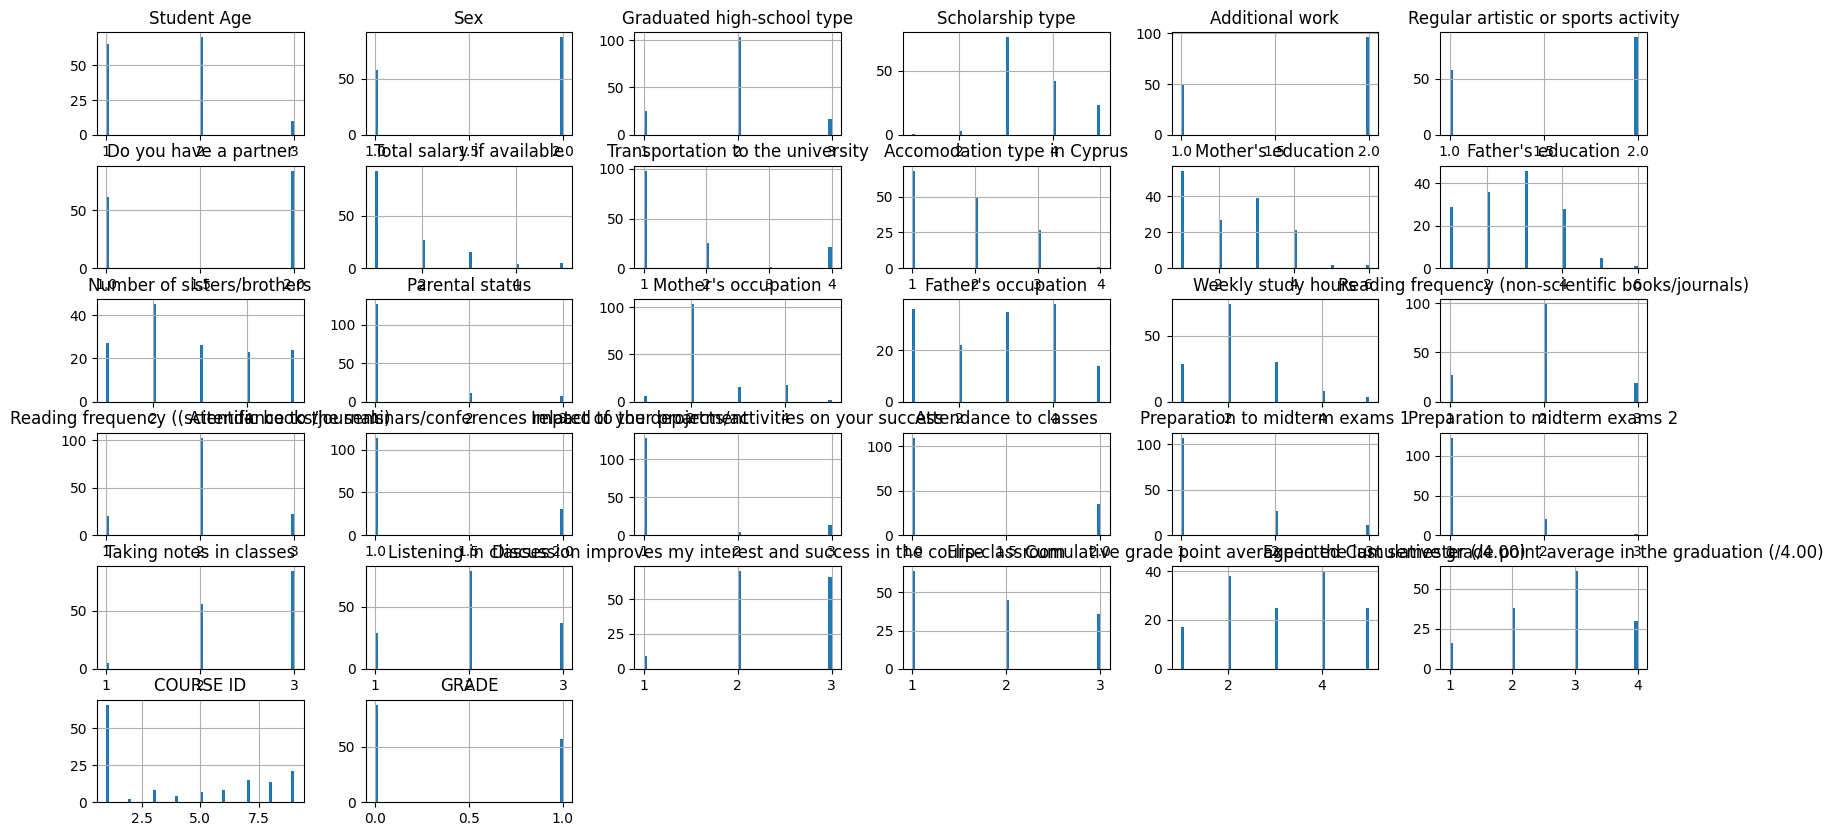

In [1588]:
#Посмотрим на данные
data.hist(bins=60, figsize=(20, 10))

In [1589]:
data.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
Student Age,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
Sex,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
Graduated high-school type,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
Scholarship type,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
Additional work,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
Regular artistic or sports activity,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
Do you have a partner,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
Total salary if available,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
Transportation to the university,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
Accomodation type in Cyprus,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [1590]:
#Удалим колонку с уникальными значениями
data = data.drop('STUDENT ID', axis=1)

# **Реализовать без использования сторонних библиотек построение дерева решений**

In [1591]:
class Node:
    def __init__(self,feature=None, threshold=None, left=None, right=None,  value=None,prob=None):
        '''
        feature- по какому признаку происходит разделение
        treshold- значение признака,который делит данные
        left- левая часть разбиения
        right- правая часть разбиения
        value- значение в конечном узле
        '''
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.prob=prob

    def is_leaf_node(self):
        return self.value is not None

In [1592]:
class DecisionTree:
    def __init__(self, max_depth=10, min_samples=10):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None

    #Обучение
    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    #Предсказания
    def predict(self, X):
        return np.array([self.travers_tree(x, self.tree) for x in X])

    #Предсказания
    def predict_prob(self, X):
        return np.array([self.travers_tree_prob(x, self.tree) for x in X])

    #Расчет энтропии
    def entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    #Наиболее частая метка класса в узле
    def most_common(self, y):
        labels = np.unique(y)
        count = [list(y).count(i) for i in labels]
        return labels[np.argmax(count)]

    #Наиболее эффективное разбиение
    def best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_gain = -1

        #Проходим по всем признакам
        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])

            #проходим по всем значениям признаков
            for threshold in thresholds:
                #Вычисляем прирост информативности
                gain = self.information_gain(X[:, i], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = i
                    best_threshold = threshold
        return best_feature, best_threshold

    #Расчет прироста информации
    def information_gain(self, X_column, y, threshold):
        # Если в узле осталась метка только одного классаб то информативность 0
        if len(np.unique(y)) == 1:
            return 0
        #Количество наблюдений в родительском узле
        n = len(y)
        #Энтропия в родительском узле
        parent = self.entropy(y)

        #Индексы наблюдений после разделения
        left_indexes = np.argwhere(X_column <= threshold).flatten()
        right_indexes = np.argwhere(X_column > threshold).flatten()

        #Энтропия в левой и в правой части
        e_l, n_l = self.entropy(y[left_indexes]), len(left_indexes)
        e_r, n_r = self.entropy(y[right_indexes]), len(right_indexes)

        #Энтропия после разделения
        child = (n_l / n) * e_l + (n_r / n) * e_r #количество наблюдений/общее число наблюдений * на энтропию
        return parent - child

    #Построение дерева
    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        #Проверяем стоп условия
        if n_samples <= self.min_samples or depth >= self.max_depth or n_labels == 1:
            return Node(prob=1,value=self.most_common(y))

        #Находим лучшее разделение
        best_feature, best_threshold = self.best_split(X, y)

        #Определяем какие наблюдения пошли влево, а какие вправо
        left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
        right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()
        if len(left_indexes) == 0 or len(right_indexes) == 0:
            mode = pd.DataFrame(y).mode()[0]
            return Node(prob=float(pd.DataFrame(y).value_counts()[mode] / len(pd.DataFrame(y))),value=self.most_common(y))

        #Рекурсия на левую и правую часть
        left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    #Предсказывание значение по построенному дереву
    def travers_tree(self, x, node):
        #Проверяем конечный узел или нет
        if node.is_leaf_node():
            return node.value
        #Если не конечная, то смотрим куда идти
        if x[node.feature] <= node.threshold:
            return self.travers_tree(x, node.left)

        return self.travers_tree(x, node.right)

     #Предсказывание значение по построенному дереву
    def travers_tree_prob(self, x, node):
        #Проверяем конечный узел или нет
        if node.is_leaf_node():
            return (node.value, node.prob)
        #Если не конечная, то смотрим куда идти
        if x[node.feature] <= node.threshold:
            return self.travers_tree_prob(x, node.left)

        return self.travers_tree_prob(x, node.right)

# **Train-test split**

In [1593]:
# Разделение на обучающий и тестовый наборы
def train_test_split_custom(X, y, test_size=0.2):
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)

    # Генерация случайных индексов для тестового набора
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

    # Индексы для обучающего набора
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [1594]:
def get_sqrt_keys(data):
  # Определим количество признаков
  num_features = data.shape[1]

  # Определим количество признаков, которые нужно отобрать (sqrt(n))
  num_selected_features = int(math.sqrt(num_features))

  # Получим список всех признаков
  all_features = list(data.iloc[:,:-1].columns)
  # Выберем случайные признаки
  selected_features = random.sample(all_features, num_selected_features)
  data_temp = data[selected_features]
  X = data_temp.values
  Y = data.iloc[:, -1].values.reshape(-1,1)
  Y = np.ravel(Y)
  return X, Y, selected_features


In [1595]:
acc=0
while(acc<0.9):
  X,Y,selected_features=get_sqrt_keys(data)
  X_train, X_test, y_train, y_test = train_test_split_custom(X, Y, test_size=0.2)
  clf = DecisionTree()
  clf.fit(X_train, y_train)
  predicted = clf.predict(X_test)
  acc = np.sum(predicted == y_test) / len(y_test)
print("Выбранные признаки - ",selected_features)
print(acc)

Выбранные признаки -  ['Taking notes in classes', 'Do you have a partner', 'COURSE ID', 'Transportation to the university', 'Regular artistic or sports activity']
0.9655172413793104


# **Metrics**

In [1596]:
import seaborn as sns
def confusion_matrix(pred_y, true_y):
    res = np.zeros((2, 2))

    for pred, true in zip(pred_y, true_y):
        pred = 1 if pred == 1 else 0
        true = 1 if true == 1 else 0
        res[pred][true] += 1

    return res

def confusion_matrix_prob(pred_probs, true_y, threshold):
    res = np.zeros((2, 2))

    for pred_prob, true in zip(pred_probs, true_y):
        pred = 1 if pred_prob >= threshold else 0
        true = 1 if true == 1 else 0
        res[pred][true] += 1

    return res

def accuracy(conf):
    return (conf[1][1] + conf[0][0]) / sum(conf.flatten())

def precision(conf):
    return conf[1][1] / (conf[1][1] + conf[1][0])

def recall(conf):
    return conf[1][1] / (conf[1][1] + conf[0][1])

def fallout(conf):
    return conf[1][0] / (conf[1][0] + conf[0][0])

def show_cf_matrix(cf_matrix):
  fig, AX = plt.subplots(figsize=(3, 2))
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ax.xaxis.set_ticklabels(['1','2'])
  ax.yaxis.set_ticklabels(['1','2'])

  plt.show()


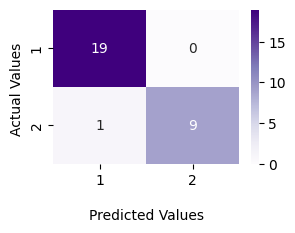

Accuracy: 0.9655172413793104
Precision 0.9
Recall: 1.0


In [1597]:
conf = confusion_matrix(predicted, y_test)
show_cf_matrix(conf)
print('Accuracy:', accuracy(conf))
print('Precision', precision(conf))
print('Recall:', recall(conf))


**AUC-ROC**

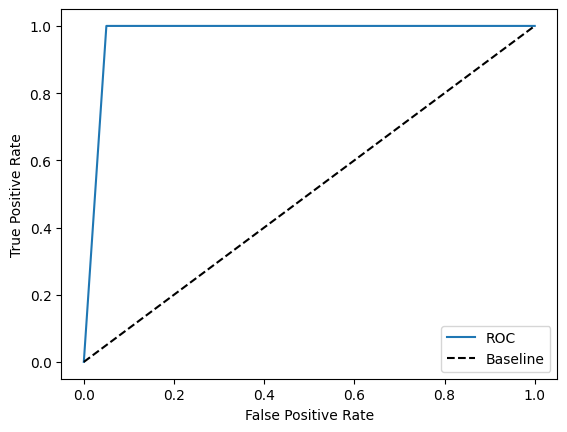

In [1598]:
pred_prob = clf.predict_prob(X_test)
probs = []
for i in range(len(pred_prob)):
    pred, prob = pred_prob[i]
    if pred == 1:
        probs.append(prob)
    else:
        probs.append(1-prob)
tpr = []
fpr = []

for th in np.arange(1, 0, -0.01):
    conf = confusion_matrix_prob(probs, y_test, th)
    tpr.append(recall(conf))
    fpr.append(fallout(conf))

plt.plot([0] + fpr + [1], [0] + tpr + [1], label='ROC')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'k--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


**AUC-PR**

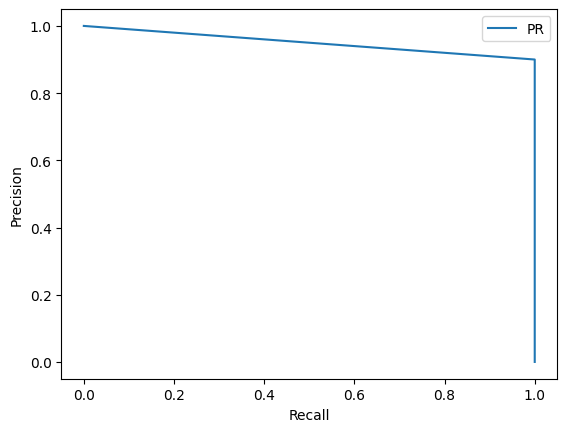

In [1599]:
p = []
r = []

for th in np.arange(0, 1, 0.01):
    conf = confusion_matrix_prob(probs, y_test, th)
    p.append(precision(conf))
    r.append(recall(conf))

plt.plot([1] + r + [0], [0] + p + [1], label='PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()